# Hypothesis Testing

 * Often a part of Exploratory Data Analysis
 * Also ubiquituous for reporting on statistical results
 * Assumptions need to be met
 * There are problems with statistical testing!

https://amstat.tandfonline.com/doi/abs/10.1080/00031305.2016.1154108

The American Statistical Association put out an article with the following points:

 * P-values can indicate how incompatible the data are with a specified statistical model.
 * P-values do not measure the probability that the studied hypothesis is true, or the probability that the data were produced by random chance alone.
 * Scientific conclusions and business or policy decisions should not be based only on whether a p-value passes a specific threshold.Proper inference requires full reporting and transparency.
 * A p-value or statistical significance does not measure the size of an effect or the importance of a result.
 * By itself, a p-value does not provide a good measure of evidence regarding a model or hypothesis.

### ok, but what is Hypothesis testing? and what is a p-value?

Hypothesis tests are usually specified in the following way:

 * A Null Hypothesis which represents the status quo
 * An Alternative hypothesis which is what you're testing for

Then, we conduct a hypothesis test *under the assumption* that the null hypothesis is true (this can take many forms)

If the test results are extremely unlikely, we view that as evidence against the null hypothesis
If they are likely, then perhaps the null hypothesis cannot be rejected.

#### Let's see an example:

Suppose we have a patient populations and we are measuring their average A1C values in two separate years. Let's say in the first case that the average A1C is 7.2 with a sample size of 90 and a standard deviation of .36 and in the second case we have an average A1C of 8.1 with a standard deviation of .4 when we test 150 patients.

What if we want to ask if the average A1C is different in this new population than the old one?

In [90]:
import numpy as np
a1c_1 = np.random.normal(7.8, .36, 15)
a1c_2 = np.random.normal(8.1, .4, 15)

In [91]:
import numpy as np
np.mean(a1c_1), np.std(a1c_1)

(7.904417222514833, 0.2679993410030288)

In [92]:
np.mean(a1c_2), np.std(a1c_2)

(8.241344665594104, 0.4096019218499488)

$$ H_0: \mu_1 = \mu_2 $$
$$ H_1: \mu_1 \neq \mu2 $$

## p-values

a *p-value* is the probability of observing data as "extreme" or more extreme than we observe, *if the null hypothesis was true*

If the p-value is lower than the significance level $\alpha$ (we usually say lower than 0.05), we could conclude that it is unlikely that if the null hypothesis were true, that we would observe this value.

In this case, we may reject the null hypothesis.

If the p-value is higher than $\alpha$, it would be fairly likely that we could observe the data that we do even if the null hypothesis were true, so we do not reject the null

## Hypothesis Test Assumptions

In all hypothesis tests, there are assumptions that have to be met. In this case, we need to assume that the two samples are random and independent, and that the distributions are normally distributed. In many cases, when we have large enough samples, certain tests are *robust* to these assumptions, so we can safely use them even if things are not perfectly normally distributed. It is important to look up the assumptions for the test you are using and make sure that the assumptions are either satisfied or the test is robust

## Choose a test and compute the test statistic

One of the most popular hypothesis tests is the $t$ test. The $t$ test is a test for the equality of means. For this, the test statistic is:

$$T=\frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{S^2_1}{N_1} + \frac{S^2_2}{N_2}}}$$

where $\bar{X}$ are the sample means and $N$ are the sample sizes. If we assume that the standard deviations can differ, then $s^2_1$ and $s^2_2$ are the variances

The standard error of *this test statistic* is given by just the denominator

If we compute this, we get:

In [105]:
t = (np.mean(a1c_1)-np.mean(a1c_2))/np.sqrt(np.var(a1c_1, ddof = 1)/15 + np.var(a1c_2, ddof = 1)/15) 
t

-2.5754870503176526

The test-statistic has a *known* distribution that we can now use to caculate the probability of seeing a T-statistic as extreme or more extreme than we have seen. The distribution in this case has a $t$ distribution.

There is also a concept known as degrees of freedom for the *t*-test. For now, we can just say that the degrees of freedom for this test is:

In [94]:
((np.var(a1c_1, ddof=0)/15 + np.var(a1c_2, ddof = 0)/15)**2) / ( (np.var(a1c_1, ddof=0)/15)**2 / (15-1) + (np.var(a1c_2, ddof=0)/15)**2 / (15-1))

24.13020753497764

In [95]:
def _unequal_var_ttest_denom(v1, n1, v2, n2):
    vn1 = v1 / n1
    vn2 = v2 / n2
    with np.errstate(divide='ignore', invalid='ignore'):
        df = (vn1 + vn2)**2 / (vn1**2 / (n1 - 1) + vn2**2 / (n2 - 1))

    # If df is undefined, variances are zero (assumes n1 > 0 & n2 > 0).
    # Hence it doesn't matter what df is as long as it's not NaN.
    df = np.where(np.isnan(df), 1, df)
    denom = np.sqrt(vn1 + vn2)
    return df, denom

In [106]:
df, se = _unequal_var_ttest_denom(np.var(a1c_1), 15, np.var(a1c_2), 15)

In [107]:
df, se

(array(24.13020753), 0.1263849624919118)

In [108]:
from scipy import stats
import matplotlib.pyplot as plt

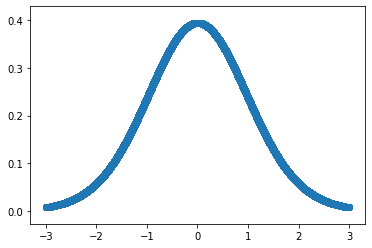

In [109]:
a = np.linspace(-3, 3, 100000)
b = stats.t.pdf(a, df)
fig, axes = plt.subplots()
axes.scatter(a, b)
# axes.axvline(lower, linestyle = ":", color = "red")
# axes.axvline(upper, linestyle = ":", color = "red")

In [110]:
import math
stats.t.cdf(t, df) * 2# For two-sided

0.016558721821387366

In [101]:
from scipy import stats

In [102]:
stats.ttest_ind(a1c_1, a1c_2, equal_var = False)

Ttest_indResult(statistic=-2.5754870503176526, pvalue=0.016558721821387373)

In [103]:
from statsmodels.stats import weightstats as sms

In [104]:
sms.ttest_ind(a1c_1, a1c_2, alternative = "two-sided", usevar="unequal")

(-2.5754870503176535, 0.016558721821387345, 24.130207534977636)

## General Procedure for Hypothesis Testing

1. Set a Null and Alternative Hypothesis
2. Choose a test and make sure that your data meets the assumptions
2. Compute a test statistic 
3. Use the distribution of the test statistic to compute a p-value
4. Check whether the p-value falls over or under the $\alpha$ significance level

# One-sided vs. two-sided tests

#### One-sided

$$ H_0: \mu_1 = \mu_2 $$

$$ H_1: \mu_1 < \mu_2 $$

![](./assets/onetailed.png)

![](./assets/twotailed.png)

# Confidence Intervals

Notice that a p-value tells us nothing about the actual difference between the two means. This is one of the reasons why p-values are not enough to characterize the difference between two parameters. Because of this, oftentimes it is useful to generate a confidence interval.

In this case, the confidence interval would be centered at the difference that we observed. If we want to generate a 95% confidence interval, we would select values of the T statistic's distribution:

$$T \sim t_{dof}$$

such that the cdfs are between 0.025 and 0.975 (this encompasses 95%) and then add and subtract those from our sample mean


In [112]:
lower = stats.t.ppf(0.025, math.floor(df))
lower

-2.063898561628021

In [113]:
upper = stats.t.ppf(0.975, math.floor(df))
upper

2.0638985616280205

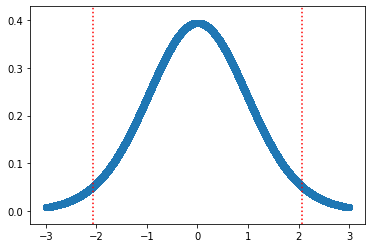

In [114]:
a = np.linspace(-3, 3, 100000)
b = stats.t.pdf(a, df)
fig, axes = plt.subplots()
axes.scatter(a, b)
axes.axvline(lower, linestyle = ":", color = "red")
axes.axvline(upper, linestyle = ":", color = "red")

In [115]:
np.mean(a1c_1) - np.mean(a1c_2) + se*lower, np.mean(a1c_1) - np.mean(a1c_2) - se*lower

(-0.5977731853777395, -0.07608170078080306)

In [116]:
cm = sms.CompareMeans(sms.DescrStatsW(a1c_1), sms.DescrStatsW(a1c_2))
print(cm.tconfint_diff(usevar='unequal'))

(-0.6068513590926821, -0.06700352706586038)


### Types of errors in hypothesis testing

![](./assets/errortypes.png)

### Multiple hypotheses

![](./assets/greenjellybean.png)

# Downsides to p-values

 * p-values are dependent on sample size
 * p-values are NOT the probability that the null hypothesis is true!!!
 * Statistical Significance is not practical significance

In [117]:
example_1 = np.random.normal(1, 0.5, 100000)
example_2 = np.random.normal(.98, 0.5, 100000)
stats.ttest_ind(example_1, example_2, equal_var = False)

Ttest_indResult(statistic=10.227529469575789, pvalue=1.5137347317508313e-24)

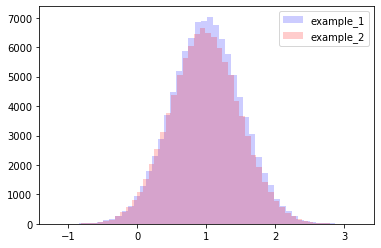

In [118]:
fig, axes = plt.subplots()
axes.hist(example_1, alpha = 0.2, color = "blue", bins= 50, label = 'example_1')
axes.hist(example_2, alpha = 0.2, color = "red", bins = 50, label = 'example_2')
axes.legend()

## Misinterpretations of Confidence Intervals

Oftentimes, people think that for a 95% confidence interval, there is a 95% probability that the true mean (or other parameter of interest) falls within the interval. However, the true mean is an unknown constant, *as are the endpoints of a confidence interval*. 
